In [15]:
import numpy as np
import matplotlib.pyplot as plt
import get_data as gd
import Preprocessing as p
import SimpleITK as sitk
import seaborn as sns
from scipy import stats, signal
import statistics
import ImageViewer as iv
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import statistics as stat

%matplotlib notebook

In [2]:
def create_dataframe(folder_path, image_prefix, mask_suffix):
    """
    Returns a dataframe with information of the images in the folder_path
    
    folder_path: path to folder with images
    image_prefix: prefix of image files
    mask_suffix: suffix of mask files
    """
    patientPaths, patientNames, imagePaths, maskPaths = gd.get_paths(folder_path, image_prefix, mask_suffix)
    df = p.dataframe(patientPaths, patientNames, imagePaths, maskPaths)
    df = p.dimensions(df)
    return df

In [3]:
def get_array_from_image(path):
    
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    image_size = np.shape(array)
    array = array.flatten()
    return array, image_size

In [40]:
def zscore_norm(data):
    
    if (len(np.shape(data))) == 1:
        data = np.expand_dims(data, axis=1)
        
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaler.fit(data)
    
    norm_data = scaler.transform(data)
    print(norm_data)
    
    return norm_data

In [41]:
def reconstruct_image_array(array, image_size):
    
    im = np.reshape(array, image_size)
    im = im.astype(int)
    im = sitk.GetImageFromArray(im)
    
    return im

In [42]:
def create_destination_paths(dst_main_folder):

    dst_subfolder_list = [f for f in os.listdir(dst_main_folder) 
                          if os.path.isdir(os.path.join(dst_main_folder, f))]

    dst_list = []

    for i in range(len(dst_subfolder_list)):
        dst_list.append(dst_main_folder + '/' + dst_subfolder_list[i])
        
    return dst_list

In [55]:
def main():
    
    #image_filename = 'image.nii'
    #mask_filename = '1 RTSTRUCT LARC_MRS1-label.nii'
    image_filename = 'T2.nii'
    mask_filename = 'manual_an.nii'
    
    df = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped', image_filename, mask_filename)
    
    destination_paths = create_destination_paths('/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped_ZScoreNorm')
    
    for i in range(len(df['imagePaths'])):
        
        array, image_size = get_array_from_image(df['imagePaths'][i])
        norm_array = zscore_norm(array)
        #norm_array = norm_array.reshape(-1)
        
        norm_image = reconstruct_image_array(norm_array, image_size)
        mask = sitk.ReadImage(df['maskPaths'][i])
        
        sitk.WriteImage(norm_image, os.path.join(destination_paths[i], image_filename))
        sitk.WriteImage(mask, os.path.join(destination_paths[i], mask_filename))

In [56]:
main()

[[-1.23908017]
 [-1.19985552]
 [-1.20966168]
 ...
 [ 0.82021392]
 [ 1.20265426]
 [ 1.38897134]]
[[-0.97868589]
 [-0.69634853]
 [-0.76410949]
 ...
 [-1.38525171]
 [-1.1819688 ]
 [-1.04644686]]
[[-0.09650883]
 [-0.35897064]
 [-0.89398894]
 ...
 [ 2.21517401]
 [ 2.23536338]
 [ 2.38678366]]
[[-1.45897967]
 [-1.29161176]
 [-1.16887529]
 ...
 [-0.70024514]
 [-0.42129863]
 [-0.09772067]]
[[-1.40378522]
 [-1.37642751]
 [-1.29435435]
 ...
 [ 0.5796493 ]
 [ 0.22399897]
 [-0.1179725 ]]
[[-1.62008702]
 [-1.62008702]
 [-1.65010714]
 ...
 [ 0.81154234]
 [ 0.99166304]
 [ 1.20180385]]
[[ 0.85202474]
 [ 0.68463889]
 [ 0.62884361]
 ...
 [-1.07849205]
 [-1.14544639]
 [-1.34630941]]
[[-1.67631918]
 [-1.69913645]
 [-1.66491055]
 ...
 [-0.0905194 ]
 [-0.0905194 ]
 [-0.0562935 ]]
[[ 1.233371  ]
 [ 0.96565182]
 [ 0.79656603]
 ...
 [-0.90838239]
 [-0.85202046]
 [-0.6547537 ]]
[[-1.31684003]
 [-1.50253182]
 [-1.54895476]
 ...
 [ 2.0372178 ]
 [ 2.07203501]
 [ 2.26933253]]
[[-1.02766066]
 [-1.08434939]
 [-1.16371

[[-1.51134409]
 [-1.40928242]
 [-1.30722074]
 ...
 [-1.2868084 ]
 [-1.2868084 ]
 [-1.20515906]]
[[-1.29106788]
 [-1.49671421]
 [-1.54241339]
 ...
 [-1.02829758]
 [-0.87977523]
 [-0.53703135]]
[[ 0.06295951]
 [ 0.20887845]
 [ 0.10785765]
 ...
 [-1.75541487]
 [-1.7329658 ]
 [-1.6992922 ]]
[[ 0.10357914]
 [ 0.18739397]
 [ 0.0477026 ]
 ...
 [-0.11992705]
 [-0.14786532]
 [-0.28755669]]
[[-1.43535025]
 [-1.41025286]
 [-1.37678967]
 ...
 [ 2.26233218]
 [ 2.27906377]
 [ 2.23723479]]
[[-0.91859353]
 [-1.08378422]
 [-1.21010652]
 ...
 [ 1.87993116]
 [ 1.77304306]
 [ 1.68558916]]
[[-1.32296822]
 [-1.35168308]
 [-1.12196424]
 ...
 [-1.00710483]
 [-1.09324939]
 [-1.29425337]]
[[-1.56062257]
 [-1.52462525]
 [-1.48862793]
 ...
 [-1.14065386]
 [-1.17665118]
 [-1.21264849]]
[[-1.38248778]
 [-1.31705108]
 [-1.30614496]
 ...
 [-0.24825152]
 [-0.20462705]
 [-0.1719087 ]]
[[ 0.07533828]
 [ 0.13971388]
 [ 0.09947913]
 ...
 [-1.63061512]
 [-1.63866207]
 [-1.63866207]]
[[-0.28547782]
 [-0.17730834]
 [-0.11549

In [57]:
def show_image(image, mask):#, image_prefix, mask_suffix):
    """
    Uses the ImageViewer to show the image
    """
    v = iv.Viewer(view_mode='2', mask_to_show=['a'])
    v.set_image(image)#, label=image_prefix)
    v.set_mask(mask)#, label=mask_suffix)
    v.show()

<IPython.core.display.Javascript object>


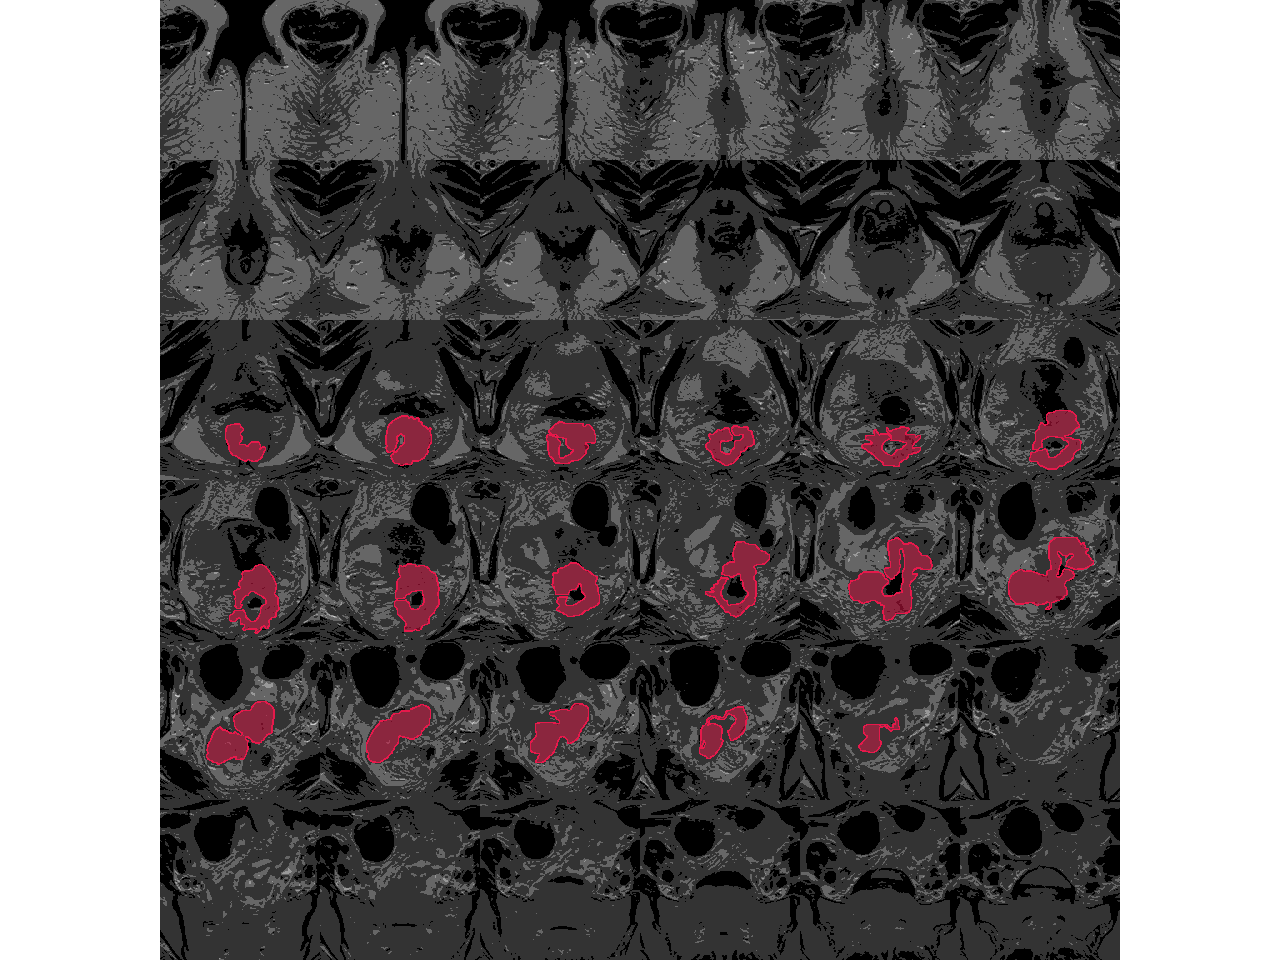

In [283]:
image = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped_ZScoreNorm/LARC-RRP-091/image.nii')
mask = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped_ZScoreNorm/LARC-RRP-091/1 RTSTRUCT LARC_MRS1-label.nii')
#image = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped_ZScoreNorm/Oxytarget_192_PRE/T2.nii')
#mask = sitk.ReadImage('/Volumes/LaCie/MasterThesis_Ingvild/Oxy_cropped_ZScoreNorm/Oxytarget_192_PRE/manual_an.nii')


v = iv.Viewer(view_mode='2', mask_to_show=['a'])
v.set_image(image, label='image')
v.set_mask(mask, label='mask')
v.show()

In [62]:
def pixel_distribution(pixel_list):
    """
    Plots the distribution of pixels in the images 
    """
    fig, ax = plt.subplots(figsize=(11,8))
    for i in range(len(pixel_list)):
        sns.kdeplot(data=pixel_list[i], ax=ax)
    plt.xlabel('Pixel intensity')
    plt.show()

In [52]:
def plot_pixel_distribution(df):
    
    plt.figure(figsize=(11,8))
    
    for i in range(len(df['imagePaths'])):
        array, image_size = get_array_from_image(df['imagePaths'][i])
        sns.kdeplot(data=array)
        
    plt.xlabel('Pixel intensity')
    plt.show()

<IPython.core.display.Javascript object>


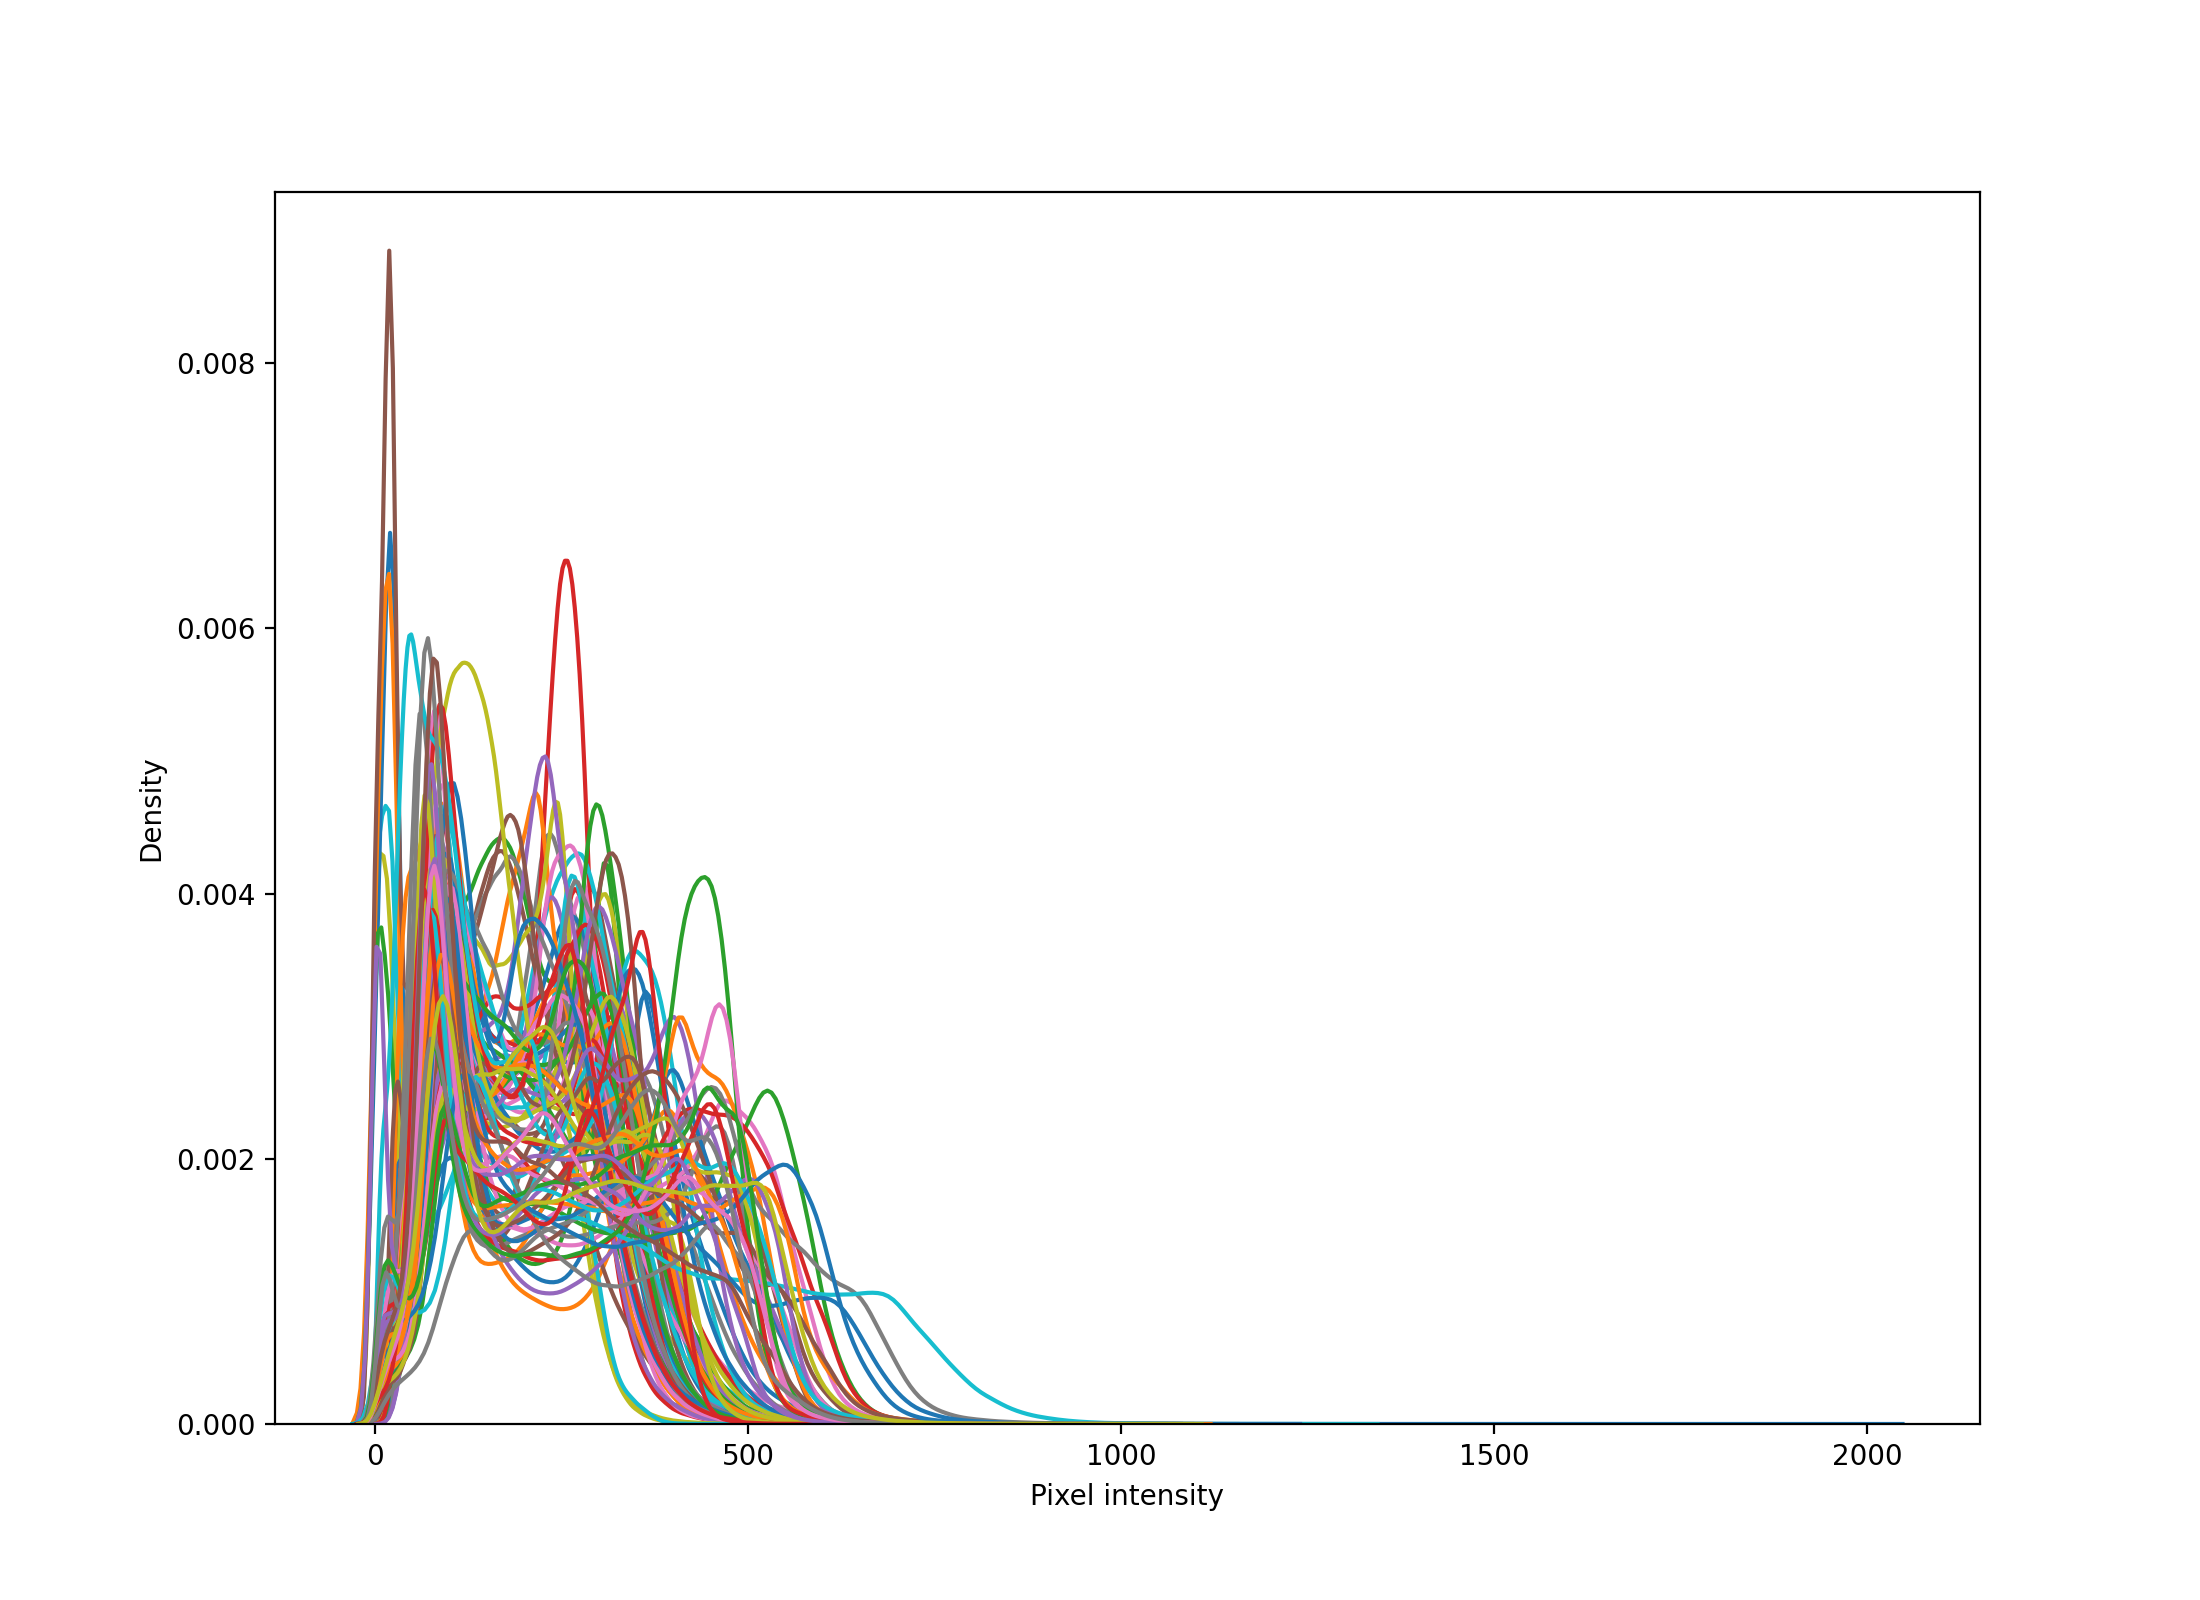

In [53]:
image_filename = 'image.nii'
mask_filename = '1 RTSTRUCT LARC_MRS1-label.nii'
#image_filename = 'T2.nii'
#mask_filename = 'manual_an.nii'

df = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped', image_filename, mask_filename)

#df_small = df[:10]

plot_pixel_distribution(df)

<IPython.core.display.Javascript object>


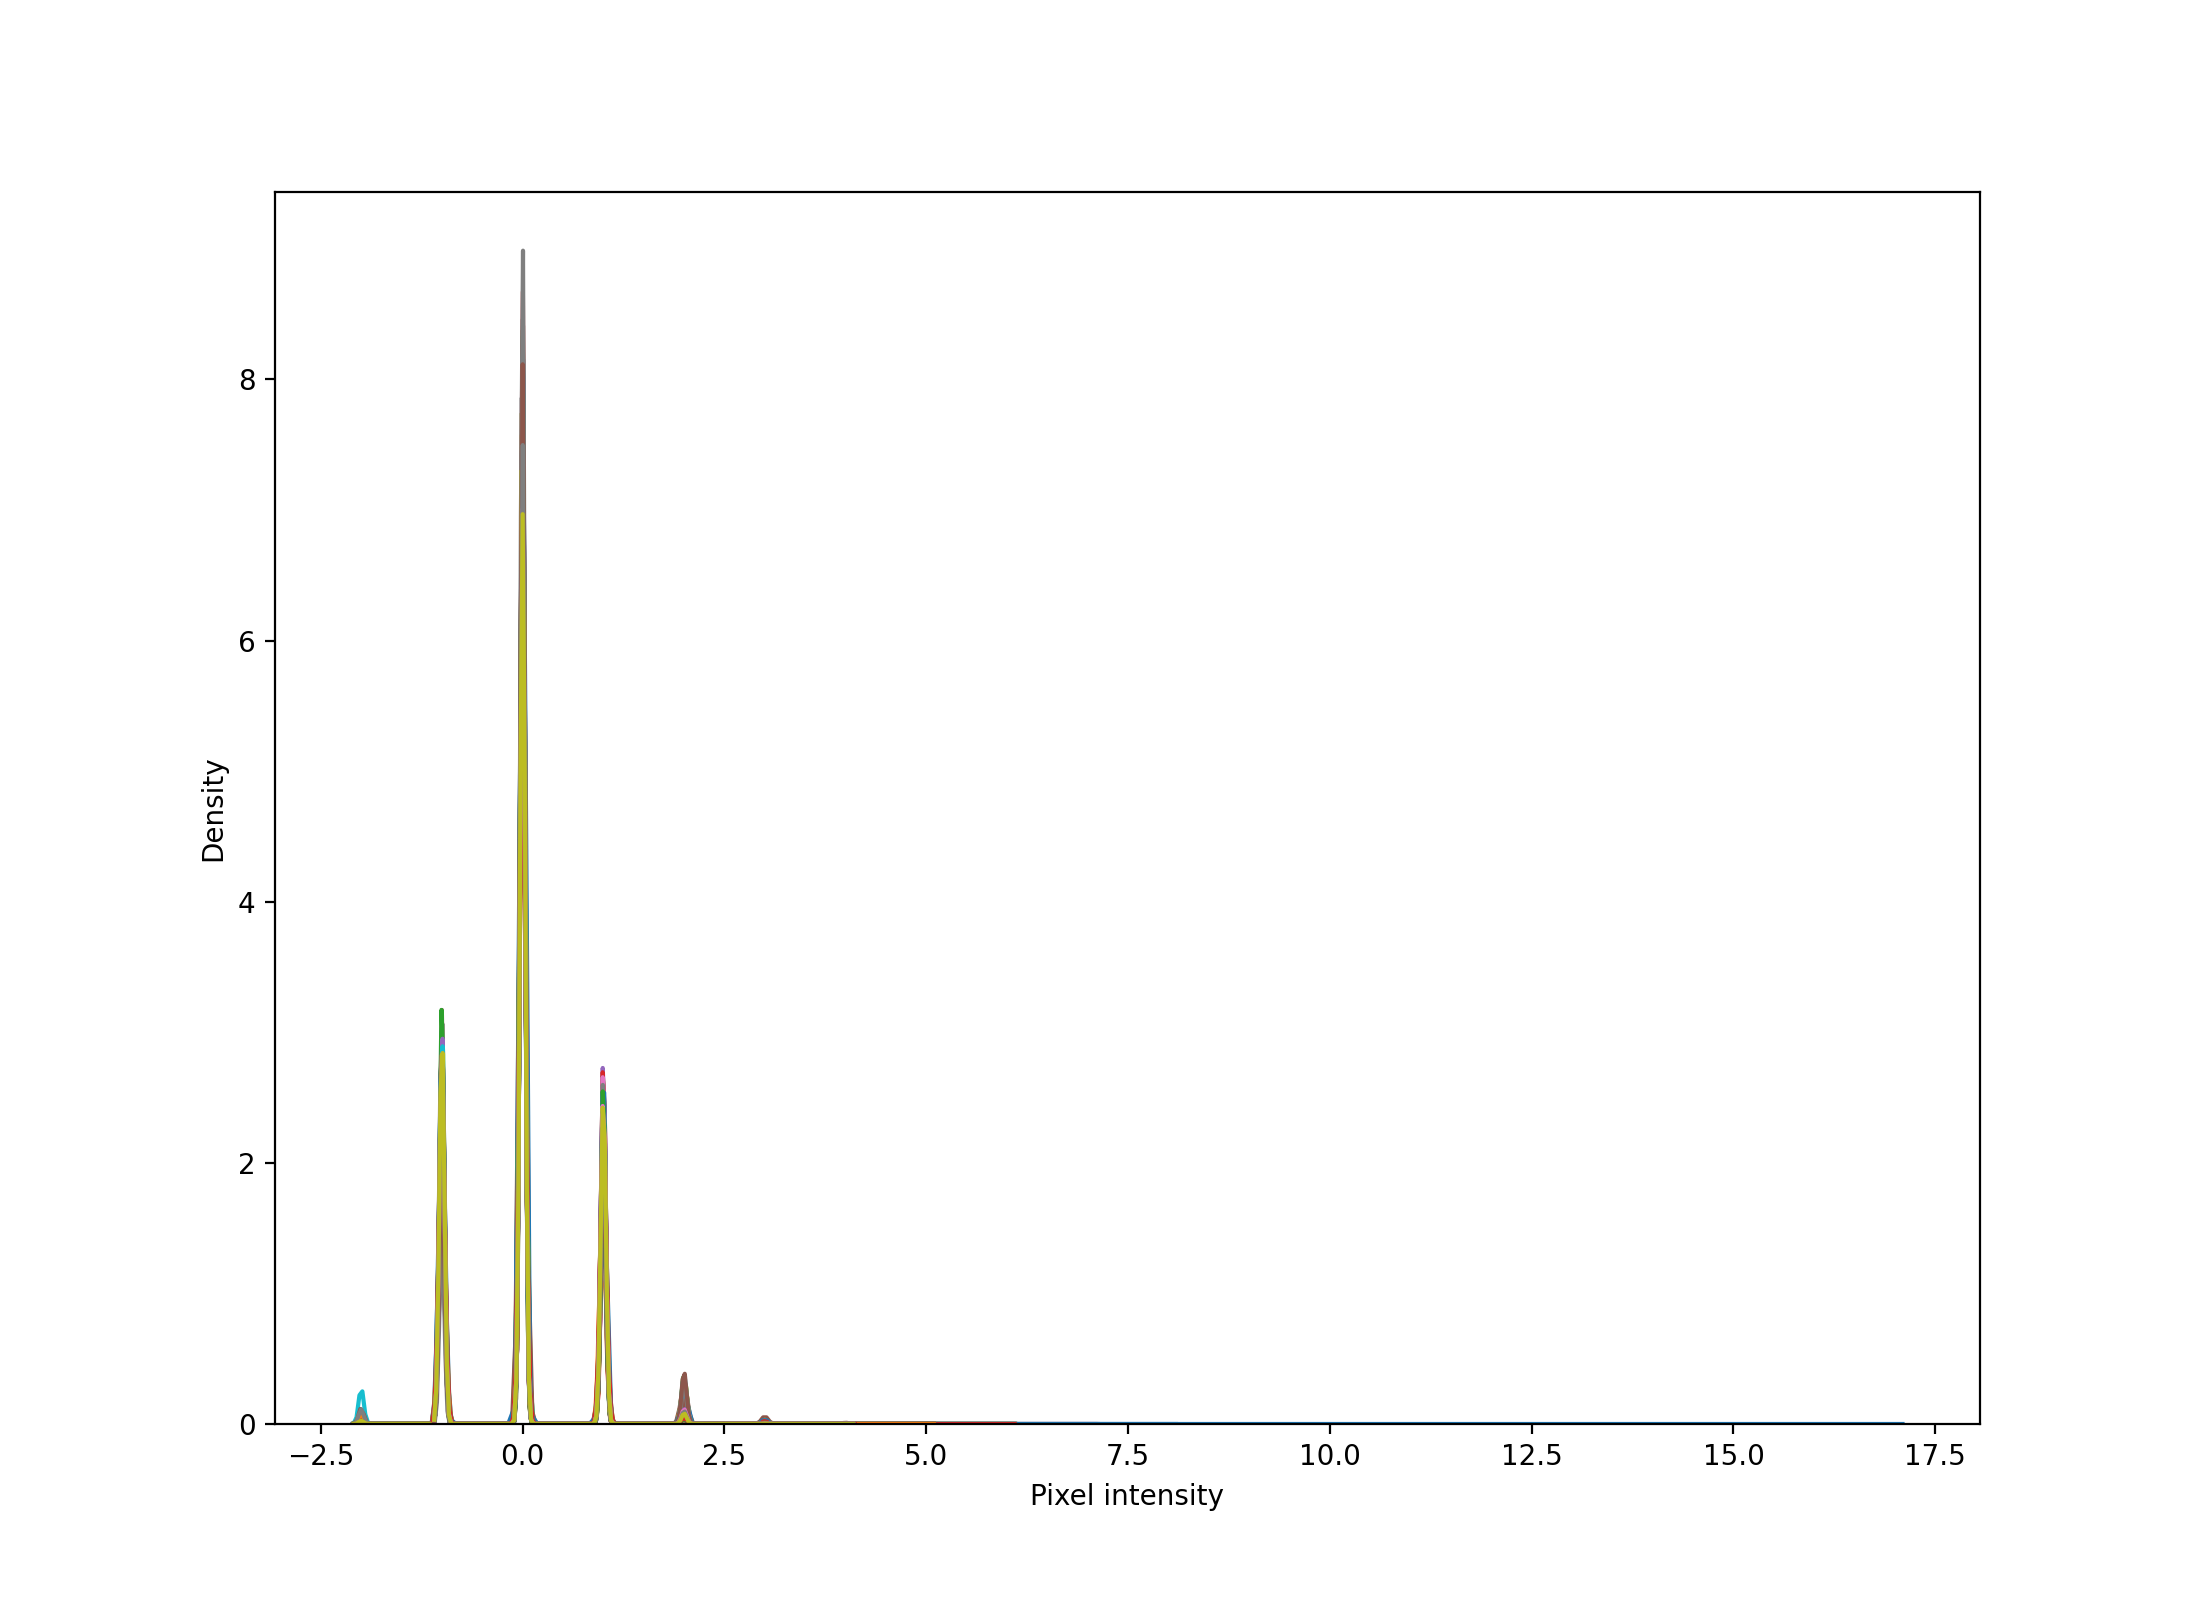

In [54]:
image_filename = 'image.nii'
mask_filename = '1 RTSTRUCT LARC_MRS1-label.nii'
#image_filename = 'T2.nii'
#mask_filename = 'manual_an.nii'

df = create_dataframe('/Volumes/LaCie/MasterThesis_Ingvild/LARC_cropped_ZScoreNorm', image_filename, mask_filename)

#df_small = df[:10]
#df_small

plot_pixel_distribution(df)